In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df=pd.read_csv("/content/dataset.csv")

In [3]:
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57216 entries, 0 to 57215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              57216 non-null  object
 1   content               57216 non-null  object
 2   score                 57216 non-null  int64 
 3   thumbsUpCount         57216 non-null  int64 
 4   reviewCreatedVersion  51320 non-null  object
 5   at                    57216 non-null  object
 6   replyContent          2480 non-null   object
 7   repliedAt             2480 non-null   object
 8   predicted_category    57216 non-null  object
 9   sentiment             57216 non-null  object
 10  appVersion            8809 non-null   object
dtypes: int64(2), object(9)
memory usage: 4.8+ MB


In [5]:
df.isnull().sum()

,0
reviewId,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,5896
at,0
replyContent,54736
repliedAt,54736
predicted_category,0
sentiment,0


In [6]:
df['reviewCreatedVersion'].fillna(df['reviewCreatedVersion'].mode()[0],inplace=True)
df['replyContent'].fillna(df['replyContent'].mode()[0],inplace=True)
df['repliedAt'].fillna(df['repliedAt'].mode()[0],inplace=True)
df['appVersion'].fillna(df['appVersion'].mode()[0],inplace=True)


In [7]:
df.isnull().sum()

,0
reviewId,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0
predicted_category,0
sentiment,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57216 entries, 0 to 57215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              57216 non-null  object
 1   content               57216 non-null  object
 2   score                 57216 non-null  int64 
 3   thumbsUpCount         57216 non-null  int64 
 4   reviewCreatedVersion  57216 non-null  object
 5   at                    57216 non-null  object
 6   replyContent          57216 non-null  object
 7   repliedAt             57216 non-null  object
 8   predicted_category    57216 non-null  object
 9   sentiment             57216 non-null  object
 10  appVersion            57216 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.8+ MB


In [9]:
df.shape

(57216, 11)

In [10]:
df.drop(["repliedAt","replyContent","appVersion","reviewCreatedVersion","reviewId","at"],axis=1,inplace=True)

In [11]:
df

,content,score,thumbsUpCount,predicted_category,sentiment
0,woww,5,0,USER_EXPERIENCE,NEUTRAL
1,let me know more details about this,3,0,CONTENT,NEUTRAL
2,i've been using this for a while and there's a...,2,0,INTERFACE,NEGATIVE
3,good,2,0,USER_EXPERIENCE,POSITIVE
4,mjkobe,5,0,USER_EXPERIENCE,NEUTRAL
...,...,...,...,...,...
57211,very good,5,0,USER_EXPERIENCE,POSITIVE
57212,it's cool to be part of this it real so guys j...,5,0,USER_EXPERIENCE,POSITIVE
57213,put filter for people who don't want to become...,3,0,USER_EXPERIENCE,NEUTRAL
57214,nice app,5,0,USER_EXPERIENCE,POSITIVE


In [12]:
# Step 4: Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [15]:
df['cleaned_review'] = df['content'].apply(preprocess_text)
df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

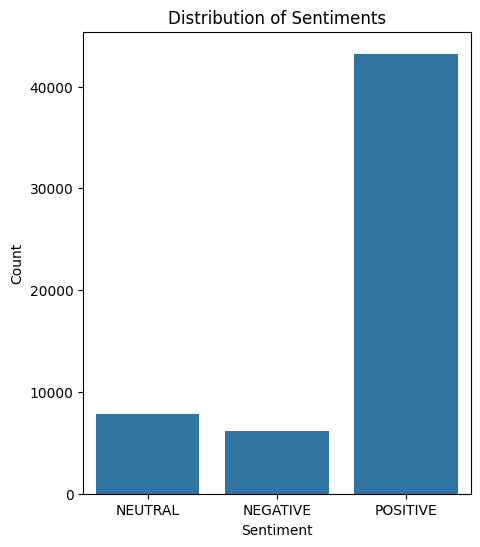

In [29]:
# Distribution of sentiment
plt.figure(figsize=(5, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

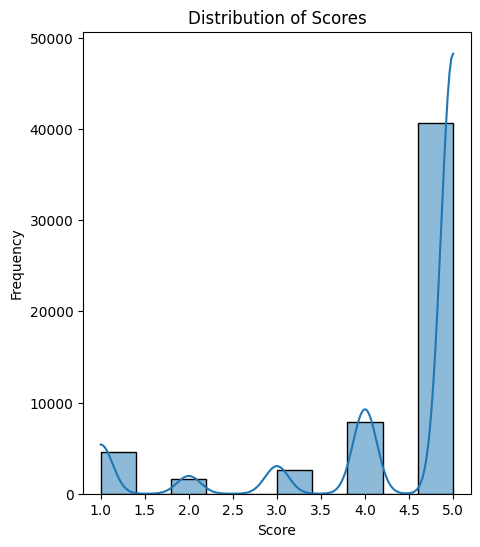

In [32]:
plt.figure(figsize=(5, 6))
sns.histplot(df['score'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Step 5: Vectorization using TF-IDF
tfidf= TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])


In [ ]:
# Step 6: Train-Test Split
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.61      0.13      0.22      1237
     NEUTRAL       0.25      0.75      0.37      1584
    POSITIVE       0.94      0.68      0.79      8623

    accuracy                           0.63     11444
   macro avg       0.60      0.52      0.46     11444
weighted avg       0.81      0.63      0.67     11444



In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.63      0.70      1237
     NEUTRAL       0.63      0.14      0.23      1584
    POSITIVE       0.84      0.99      0.91      8623

    accuracy                           0.83     11444
   macro avg       0.75      0.59      0.61     11444
weighted avg       0.81      0.83      0.79     11444



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.77      0.61      0.68      1237
     NEUTRAL       0.68      0.57      0.62      1584
    POSITIVE       0.90      0.96      0.93      8623

    accuracy                           0.87     11444
   macro avg       0.79      0.71      0.74     11444
weighted avg       0.86      0.87      0.86     11444



In [ ]:
# Step 7: Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 8: Model Evaluation
y1= model.predict(X_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.65      0.71      1237
     NEUTRAL       0.67      0.57      0.62      1584
    POSITIVE       0.92      0.97      0.94      8623

    accuracy                           0.88     11444
   macro avg       0.79      0.73      0.75     11444
weighted avg       0.87      0.88      0.87     11444



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8765291855994407


In [ ]:
print(accuracy_score(y_train, y1))

0.9069300008738967


In [ ]:
# Step 9: Prediction Check
def predict_category(review_text):
    review_text_cleaned = preprocess_text(review_text)
    review_text_cleaned = remove_stopwords(review_text_cleaned)
    review_text_vectorized = tfidf.transform([review_text_cleaned])
    prediction = model.predict(review_text_vectorized)
    return prediction[0]


In [ ]:
# Example prediction
sample_review = "using basic bug still fixed scrolling articles"
predicted_category = predict_category(sample_review)
print(f"Predicted Category for the review '{sample_review}': {predicted_category}")

Predicted Category for the review 'using basic bug still fixed scrolling articles': NEGATIVE


In [ ]:
sample_review = "woww	"
predicted_category = predict_category(sample_review)
print(f"Predicted Category for the review '{sample_review}': {predicted_category}")

Predicted Category for the review 'woww	': NEUTRAL


In [ ]:
sample_review = "good"
predicted_category = predict_category(sample_review)
print(f"Predicted Category for the review '{sample_review}': {predicted_category}")

Predicted Category for the review 'good': POSITIVE


In [ ]:
import pickle

In [ ]:
#save classifier to load in our flask server
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
#save tfidf object to load in our flask server
pickle.dump(tfidf,open('tfidf.pkl','wb'))